In [3]:
library(geneBasisR)
library(SingleCellExperiment)
library(tibble) 
library(ggplot2)
library(ggpubr)
library(Seurat)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

In [13]:
seurat_obj = qs::qread('../probe_selection/_targets/objects/exp_ngo')
seurat_obj

An object of class Seurat 
38054 features across 144643 samples within 2 assays 
Active assay: SCT (18696 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [20]:
seurat_obj <- Seurat::SCTransform(seurat_obj ,
                        assay='RNA',
                        method="glmGamPoi",
                        vars.to.regress="batch",
                        vst.flavor="v2",
                        variable.features.n = 10000,          
                        verbose=TRUE)

vst.flavor='v2' set, setting model to use fixed slope and exclude poisson genes.

Calculating cell attributes from input UMI matrix: log_umi



In [23]:
seurat_obj@assays$SCT@var.features %>% length

[1] 3000

In [31]:
?gene_search

Warning message in file(out, "wt"):
"cannot open file '/scratch/nmq407/R_tmp//RtmpsfFWSp/file227314c87750': No such file or directory"
Warning message in file(con, "r"):
"cannot open file '/scratch/nmq407/R_tmp//RtmpsfFWSp/file227314c87750': No such file or directory"
ERROR while rich displaying an object: Error in file(con, "r"): cannot open the connection

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in r

gene_search {geneBasisR},R Documentation
sce,SingleCellExperiment object containing gene counts matrix (stored in 'logcounts' assay).
genes_base,Character vector specifying base genes to construct first Selection graph. Default=NULL in case no genes are supplied.
n_genes_total,Scalar specifying total number of genes to be selected (this includes base genes).
batch,Name of the field in colData(sce) to specify batch. Default batch=NULL if no batch is applied.
n.neigh,"Positive integer > 1, specifying number of neighbors to use for kNN-graph. Default n.neigh=5."
p.minkowski,Order of Minkowski distance. Default p.minkowski=3.
nPC.selection,Scalar specifying number of PCs to use for Selection Graphs. Default nPC=NULL.
nPC.all,Scalar specifying number of PCs to use for True Graph. Default nPC.all=50.
genes.discard,"Character vector containing genes to be excluded from candidates (note that they still will be used for graphs construction. If you want to exclude them from graph construction as well, just discard them prior in sce object). Default = NULL and no genes will be discarded."
genes.discard_prefix,"Character vector containing prefixes of genes to be excluded (e.g. Rpl for L ribosomal proteins. Note that they still will be used for graphs construction. If you want to exclude them from graph construction as well, just discard them prior in sce object). Default = NULL and no genes will be discarded."


In [27]:
sce = qs::qread('_targets/object')

ERROR: Error in qs::qread("_targets/object"): Failed to open _targets/object. Check file path.


In [ ]:
.get_hvg

In [15]:
var_feats = FindVariableFeatures(seurat_obj, selection.method='vst', nfeatures=10000, assay='SCT', verbose=TRUE)

In [19]:
FindVariableFeatures(seurat_obj, selection.method='vst', nfeatures=10000, assay='SCT', verbose=TRUE)

In [4]:
# seurat_obj = subset(seurat_obj, cells = sample(Cells(seurat_obj), 50000))
# seurat_obj

In [18]:
seurat_obj@assays$SCT@var.features %>% length

[1] 3000

In [10]:
sce = qs::qread('../probe_selection/_targets/objects/sce_ngo')

In [12]:
?retain_informative_genes

Warning message in file(out, "wt"):
"cannot open file '/scratch/nmq407/R_tmp//RtmpsfFWSp/file22731cfaff79': No such file or directory"
Warning message in file(con, "r"):
"cannot open file '/scratch/nmq407/R_tmp//RtmpsfFWSp/file22731cfaff79': No such file or directory"
ERROR while rich displaying an object: Error in file(con, "r"): cannot open the connection

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in r

retain_informative_genes {geneBasisR},R Documentation
sce,SingleCellExperiment object containing gene counts matrix (stored in 'logcounts' assay).
n,"Scalar (or NULL, if not applied) specifying number of top HVGs to be return. Default=NULL."
var.thresh,Scalar (float) specifying threshold for variation to filter HVGs. Default=0.
select.hvgs,Boolean specifying if we want to discard not HVGs. Default=TRUE.
discard.mt,Boolean specifying if mitochondrial genes should be discarded. Default=TRUE.


In [8]:
sce = as.SingleCellExperiment(seurat_obj, assay = 'SCT')
sce


ERROR: Error in as.SingleCellExperiment(seurat_obj, assay = "SCT"): object 'seurat_obj' not found


In [6]:
meta = as.data.frame(colData(sce))

In [7]:
umaps = as.data.frame(reducedDim(sce, "UMAP"))

In [8]:
umaps = rownames_to_column(umaps, var = "cell")

In [9]:
head(meta)

,orig.ident,nCount_RNA,nFeature_RNA,Index.10x,nCount_HTO,nFeature_HTO,Index.HTO,nCount_spliced,nFeature_spliced,nCount_unspliced,⋯,strain,treatment,time,collection_date,isolation_date,batch,predicted.id,prediction.score.max,labels,ident
,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<fct>,<fct>
GCAGCCACACAGCCAC_1_1,SI-TT-A11,69641,7356,SI-TT-A11,1532,12,D706,9837,3757,59804,⋯,obob,FGF1,Day5,220329,22/6/2022,Batch 1,Nr5a1_Bdnf,1.0000000,Nr5a1_Bdnf,2
TGCTTGCAGTTCCGTA_1_1,SI-TT-A11,71825,7455,SI-TT-A11,1616,12,D706,8834,3443,62991,⋯,obob,Veh_PF,Day14,220201,22/6/2022,Batch 1,Unassigned1,0.8065577,Unassigned1,13
TGCGGCACAGCATGCC_1_1,SI-TT-A11,65517,7244,SI-TT-A11,2197,12,D706,8779,3410,56738,⋯,BL6,Veh_PF,Day5,220329,22/6/2022,Batch 1,Nr5a1_Bdnf,1.0000000,Nr5a1_Bdnf,6
GAGGCAAGTACCTAAC_1_1,SI-TT-A11,68817,7344,SI-TT-A11,1884,12,D706,8246,3326,60571,⋯,obob,Veh_PF,Day14,220201,22/6/2022,Batch 1,Unassigned1,0.8525726,Unassigned1,13
TAGCACATCACTGTTT_1_1,SI-TT-A11,70863,7560,SI-TT-A11,1771,12,D706,9612,3747,61251,⋯,BL6,Veh_PF,Day5,220329,22/6/2022,Batch 1,Sst_Pthlh,0.6754849,Sst_Pthlh-Ghrh,33
GTAATGCTCTGTCCCA_1_1,SI-TT-A11,69910,7425,SI-TT-A11,2555,12,D706,10497,3727,59413,⋯,obob,FGF1,Day5,211213,22/6/2022,Batch 1,Hdc,1.0000000,Gm8773_Tac1-Hdc,16


In [10]:
head(umaps)

,cell,UMAP_1,UMAP_2
,<chr>,<dbl>,<dbl>
1,GCAGCCACACAGCCAC_1_1,12.8584335,5.3065737
2,TGCTTGCAGTTCCGTA_1_1,-0.1784247,9.7766235
3,TGCGGCACAGCATGCC_1_1,12.5550993,4.7494576
4,GAGGCAAGTACCTAAC_1_1,4.4063147,7.9025271
5,TAGCACATCACTGTTT_1_1,3.1402970,-0.3127557
6,GTAATGCTCTGTCCCA_1_1,-0.4066443,-2.7846415


In [11]:
dim(meta)

[1] 143931     35

In [12]:
dim(umaps)

[1] 143931      3

In [13]:
meta = cbind(meta, umaps)

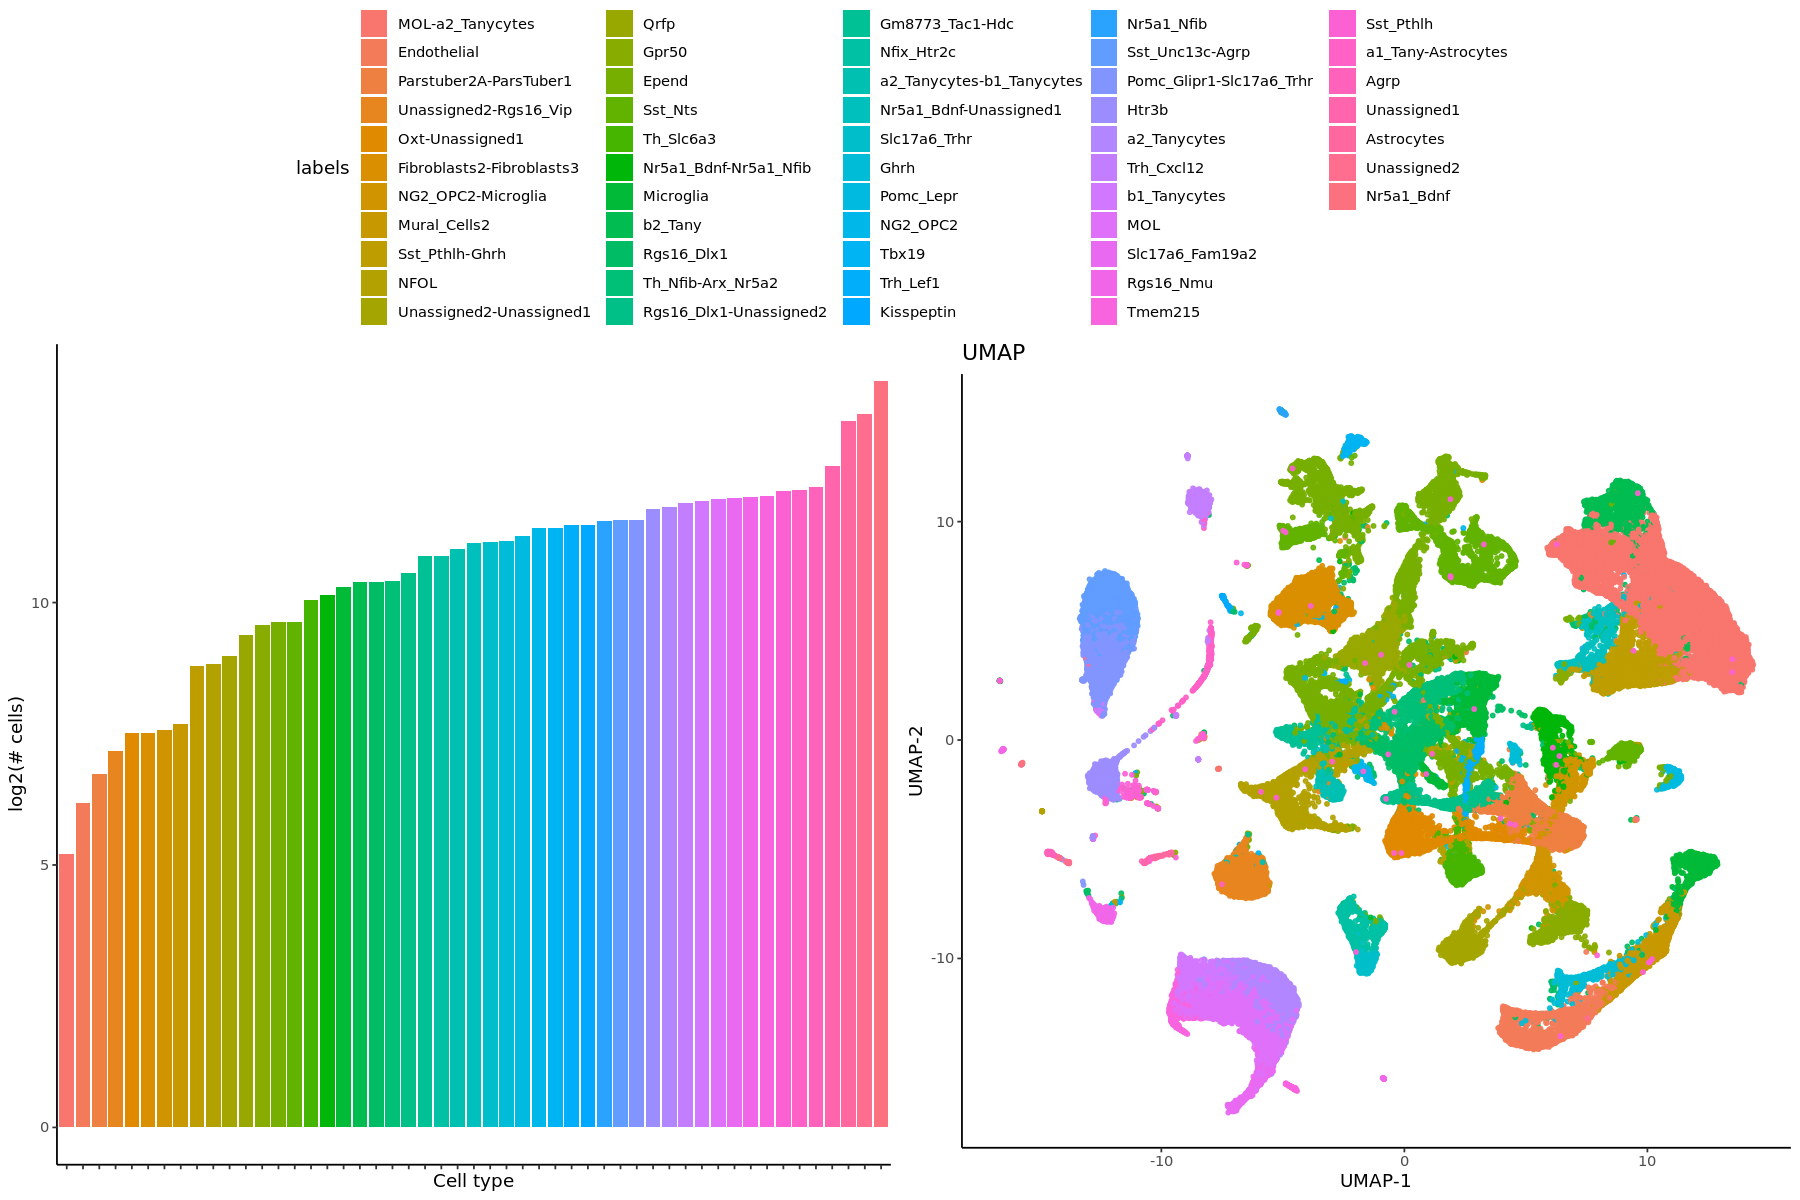

In [14]:
options(repr.plot.width=15, repr.plot.height=10)
# celltype composition
tab = as.data.frame(table(sce$labels))
colnames(tab) = c("labels" , "n")
tab = tab[order(tab$n) , ]
tab$labels = factor(tab$labels , levels = tab$labels)
p1 = ggplot(tab , aes(x = labels , y = log2(n) , fill = labels)) +
  geom_bar(stat = "identity" , position = "dodge") +
#   scale_fill_manual(values = labels_colors) +
  theme_classic() +
  theme(axis.text.x = element_blank()) +
  labs(y = "log2(# cells)", x = "Cell type")

# UMAP
p2 = ggplot(meta , aes(x = UMAP_1 , y = UMAP_2 , col = labels)) +
  geom_point(size=1,alpha = .9) +
#   scale_color_manual(values = labels_colors) +
  theme_classic() +
  labs(x = "UMAP-1" , y = "UMAP-2") +
  ggtitle("UMAP")

# combine
p = ggarrange(p1,p2, common.legend = T)
p

In [15]:
sce = retain_informative_genes(sce)

6884 genes retained

In [16]:
sce

class: SingleCellExperiment 
dim: 6884 143931 
metadata(0):
assays(2): counts logcounts
rownames(6884): Trpm3 Gpc5 ... Klk6 Klra9
rowData names(0):
colnames(143931): GCAGCCACACAGCCAC_1_1 TGCTTGCAGTTCCGTA_1_1 ...
  TTAATCCGTGATAGTA_5_3 TCACTCGAGGATACCG_5_3
colData names(36): orig.ident nCount_RNA ... ident cell
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(0):

In [6]:
sce

ERROR: Error in eval(expr, envir, enclos): object 'sce' not found


In [17]:
start_time = Sys.time()
start_time

[1] "2022-08-30 11:07:58 CEST"

In [ ]:
n_genes_total = 100
genes_stat = gene_search(sce,
                         n_genes_total = n_genes_total,
                         verbose = T)
end_time = Sys.time()

In [7]:
?gene_search

Warning message in file(out, "wt"):
"cannot open file '/scratch/nmq407/R_tmp//RtmpsfFWSp/file22734d7d8e2d': No such file or directory"
Warning message in file(con, "r"):
"cannot open file '/scratch/nmq407/R_tmp//RtmpsfFWSp/file22734d7d8e2d': No such file or directory"
ERROR while rich displaying an object: Error in file(con, "r"): cannot open the connection

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in r

gene_search {geneBasisR},R Documentation
sce,SingleCellExperiment object containing gene counts matrix (stored in 'logcounts' assay).
genes_base,Character vector specifying base genes to construct first Selection graph. Default=NULL in case no genes are supplied.
n_genes_total,Scalar specifying total number of genes to be selected (this includes base genes).
batch,Name of the field in colData(sce) to specify batch. Default batch=NULL if no batch is applied.
n.neigh,"Positive integer > 1, specifying number of neighbors to use for kNN-graph. Default n.neigh=5."
p.minkowski,Order of Minkowski distance. Default p.minkowski=3.
nPC.selection,Scalar specifying number of PCs to use for Selection Graphs. Default nPC=NULL.
nPC.all,Scalar specifying number of PCs to use for True Graph. Default nPC.all=50.
genes.discard,"Character vector containing genes to be excluded from candidates (note that they still will be used for graphs construction. If you want to exclude them from graph construction as well, just discard them prior in sce object). Default = NULL and no genes will be discarded."
genes.discard_prefix,"Character vector containing prefixes of genes to be excluded (e.g. Rpl for L ribosomal proteins. Note that they still will be used for graphs construction. If you want to exclude them from graph construction as well, just discard them prior in sce object). Default = NULL and no genes will be discarded."


In [23]:
end_time

[1] "2022-08-31 07:26:43 CEST"

In [ ]:
qs::qsave(genes_stat, 'genes_stat.qs')

In [22]:
2

[1] 2

In [24]:
genes_stat

rank,gene
<int>,<chr>
1,Nfia
2,Trpm3
3,Nrxn3
4,Erbb4
5,Cntn5
6,Il1rapl2
7,Rbfox1
8,Kcnip4
9,Gpc6


In [25]:
labels


In [29]:
start_time_2 = Sys.time()
start_time_2

[1] "2022-09-02 09:32:30 CEST"

In [24]:
?get_celltype_mapping

Warning message in file(out, "wt"):
"cannot open file '/scratch/nmq407/R_tmp//RtmpsfFWSp/file2273477a45cf': No such file or directory"
Warning message in file(con, "r"):
"cannot open file '/scratch/nmq407/R_tmp//RtmpsfFWSp/file2273477a45cf': No such file or directory"
ERROR while rich displaying an object: Error in file(con, "r"): cannot open the connection

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in r

get_celltype_mapping {geneBasisR},R Documentation
sce,SingleCellExperiment object containing gene counts matrix (stored in 'logcounts' assay).
genes.selection,Character vector specifying genes (at least 2 genes) to be used for the construction of Selection kNN-graph.
celltype.id,"Character specifying which field in colData(sce) should be used as celltype. Default celltype.id=""celltype""."
batch,Name of the field in colData(sce) to specify batch. Default batch=NULL if no batch is applied.
n.neigh,"Positive integer > 1, specifying number of neighbors to use for kNN-graph. Default n.neigh=5."
nPC.selection,"Positive integer (or NULL, if no PCA to be applied) specifying number of PCs to use for construction of True kNN-graph. Default nPC.selection=NULL."
cosine,Boolean specifying if cosine normalization should be applied prior to constructing kNN-graph. Default cosine=FALSE.
return.stat,Boolean specifying if stat for the mapping (= diagonal values for the cell type confusion matrix) should be returned alongside the mapping.
which_genes_to_use,"String specifying whether cell type mapping should be performed only on differentially expressed (between cell types) genes (= 'DE') or all selected genes (= 'all'). Default which_genes_to_use=""all""."
...,Additional arguments (e.g. the ones you can pass to get_DE_genes).


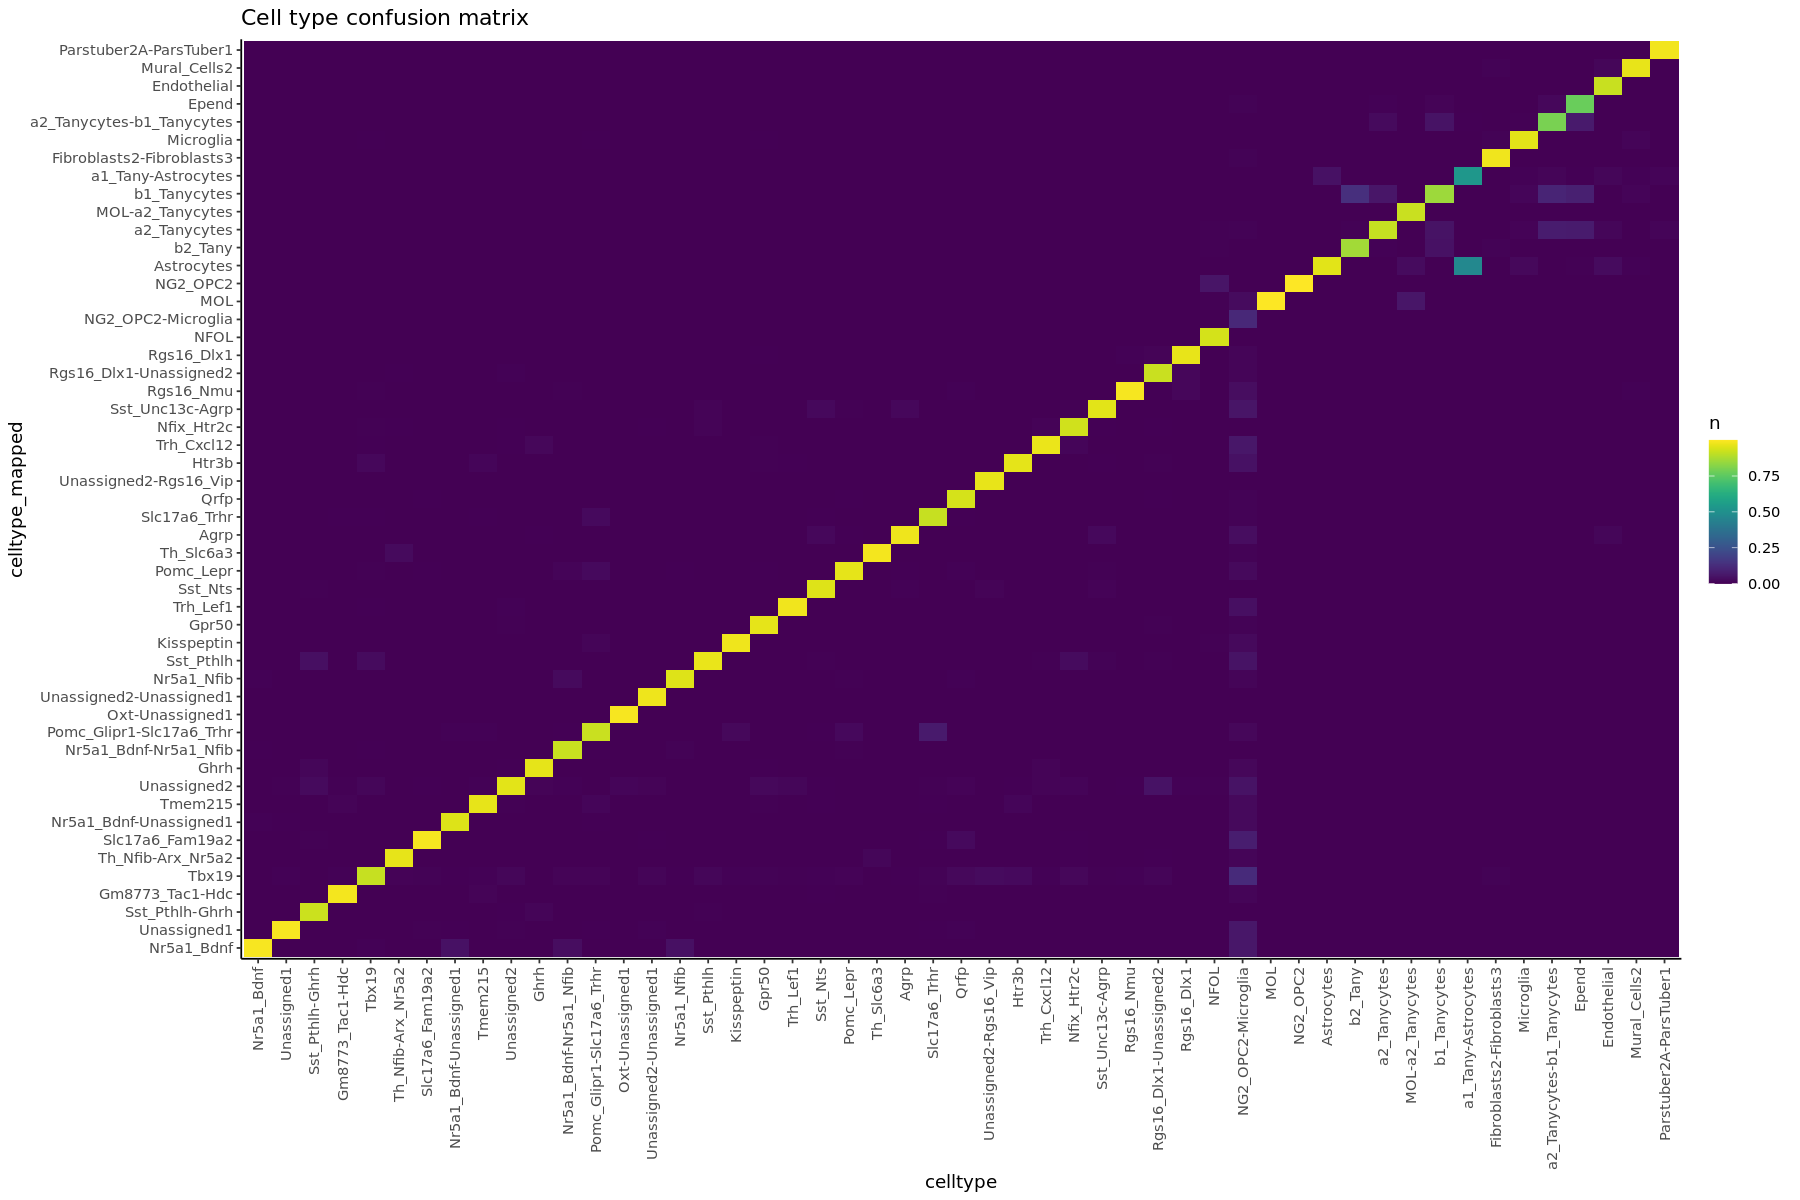

In [30]:
celltype_mapping = get_celltype_mapping(sce , genes.selection = genes, celltype.id = 'labels', return.stat = F)
p = plot_mapping_heatmap(celltype_mapping$mapping, title = "Cell type confusion matrix")
p

In [31]:
end_time_2 = Sys.time()
end_time_2

[1] "2022-09-02 10:05:21 CEST"

In [ ]:
stat = evaluate_library(sce, genes, genes.all = rownames(sce_mouseEmbryo), batch = "sample", 
                        library.size_type = "single", celltype.id = "celltype",
                        return.cell_score_stat = T, return.gene_score_stat = F, return.celltype_stat = F, verbose = FALSE)

In [34]:
genes_stat

rank,gene
<int>,<chr>
1,Nfia
2,Trpm3
3,Nrxn3
4,Erbb4
5,Cntn5
6,Il1rapl2
7,Rbfox1
8,Kcnip4
9,Gpc6


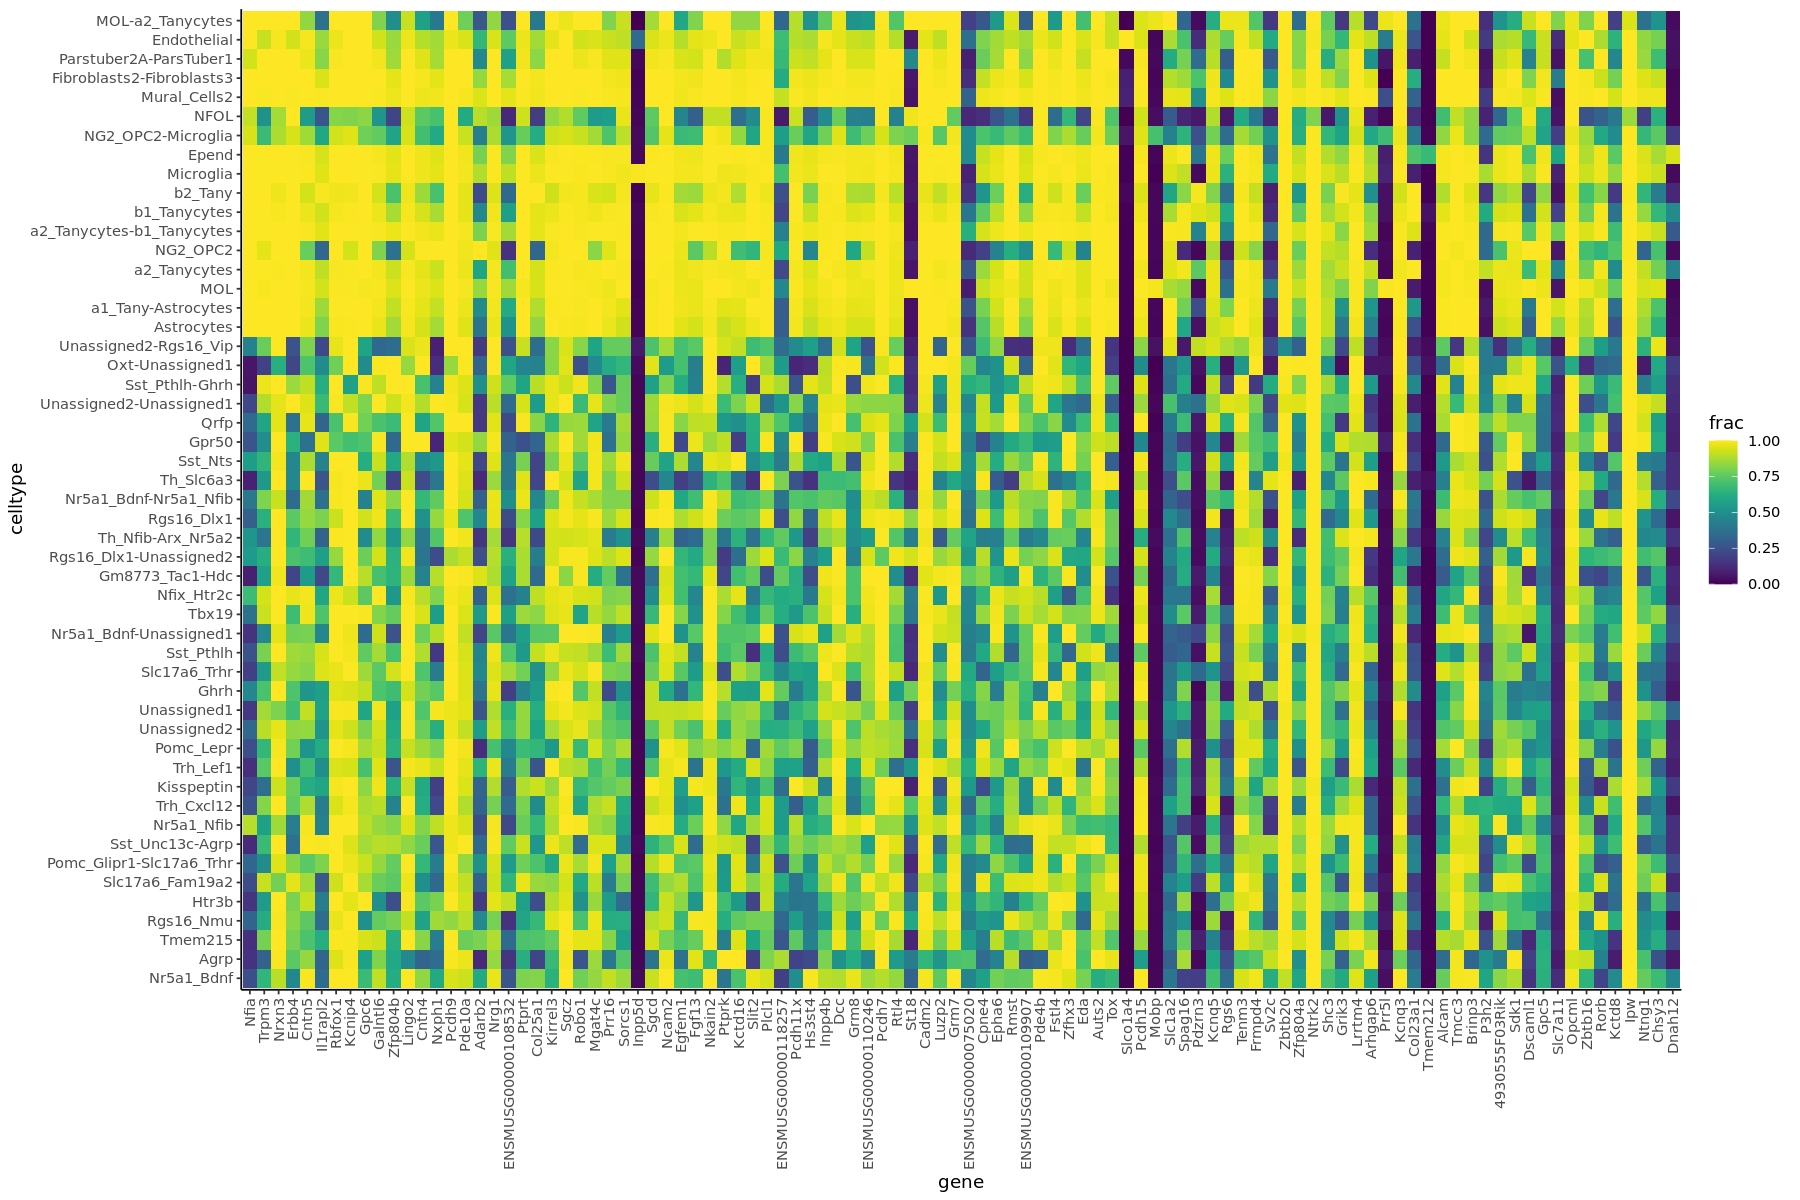

In [139]:
p = plot_expression_heatmap(sce, genes = genes, value.type = "frac", celltype.id = 'labels') 
p 

In [140]:
data = p$data

In [141]:
head(data)

,gene,value,celltype
,<fct>,<dbl>,<fct>
Nfia,Nfia,0.2333667,Nr5a1_Bdnf
Trpm3,Trpm3,0.6557973,Nr5a1_Bdnf
Nrxn3,Nrxn3,0.8961703,Nr5a1_Bdnf
Erbb4,Erbb4,0.4652584,Nr5a1_Bdnf
Cntn5,Cntn5,0.9898330,Nr5a1_Bdnf
Il1rapl2,Il1rapl2,0.3455197,Nr5a1_Bdnf


In [142]:
data_gp = tidyr::pivot_wider(data, names_from = gene, values_from = value) #gene pivoted
head(data_gp)

celltype,Nfia,Trpm3,Nrxn3,Erbb4,Cntn5,Il1rapl2,Rbfox1,Kcnip4,Gpc6,⋯,Gpc5,Slc7a11,Opcml,Zbtb16,Rorb,Kctd8,Ipw,Ntng1,Chsy3,Dnah12
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nr5a1_Bdnf,0.23336670,0.6557973,0.8961703,0.4652584,0.9898330,0.3455197,0.9999473,0.9962071,0.6801349,⋯,0.6337249,0.12674498,0.9825633,0.6482642,0.2026550,0.4750566,1,0.7640520,0.6829268,0.4579360
Unassigned1,0.15911298,0.8633862,0.8056005,0.6880868,0.9098414,0.5775332,0.9938491,0.9868890,0.5932341,⋯,0.5708967,0.10537391,0.9996763,0.6024603,0.3525413,0.2759793,1,0.8344124,0.7423114,0.3308514
Sst_Pthlh-Ghrh,0.04988662,0.9727891,1.0000000,0.8503401,0.9047619,0.6213152,1.0000000,0.5691610,0.9909297,⋯,0.5986395,0.09070295,0.9977324,0.7823129,0.5396825,0.6802721,1,0.4149660,0.5555556,0.1292517
Gm8773_Tac1-Hdc,0.08594164,0.5644562,0.9809019,0.2031830,0.5490716,0.2164456,0.6668435,1.0000000,0.8912467,⋯,0.3941645,0.09177719,0.9771883,0.2477454,0.2111406,0.3612732,1,0.2652520,0.6397878,0.1082228
Tbx19,0.37390351,0.9214181,0.9989035,0.6907895,0.9747807,0.7222222,0.9989035,0.9970760,0.9934211,⋯,0.6173246,0.10489766,0.9996345,0.7920322,0.6133041,0.5961257,1,0.7518275,0.8358918,0.2105263
Th_Nfib-Arx_Nr5a2,0.52081812,0.3878744,1.0000000,0.6544923,0.7830533,0.3133674,0.9941563,0.9963477,0.4842951,⋯,0.4536158,0.08911614,0.9956172,0.8517166,0.3666910,0.2980278,1,0.4682250,0.4733382,0.1439007


In [143]:
dendextend::ggdend()

Use either as.ggdend or ggplot (or both). 


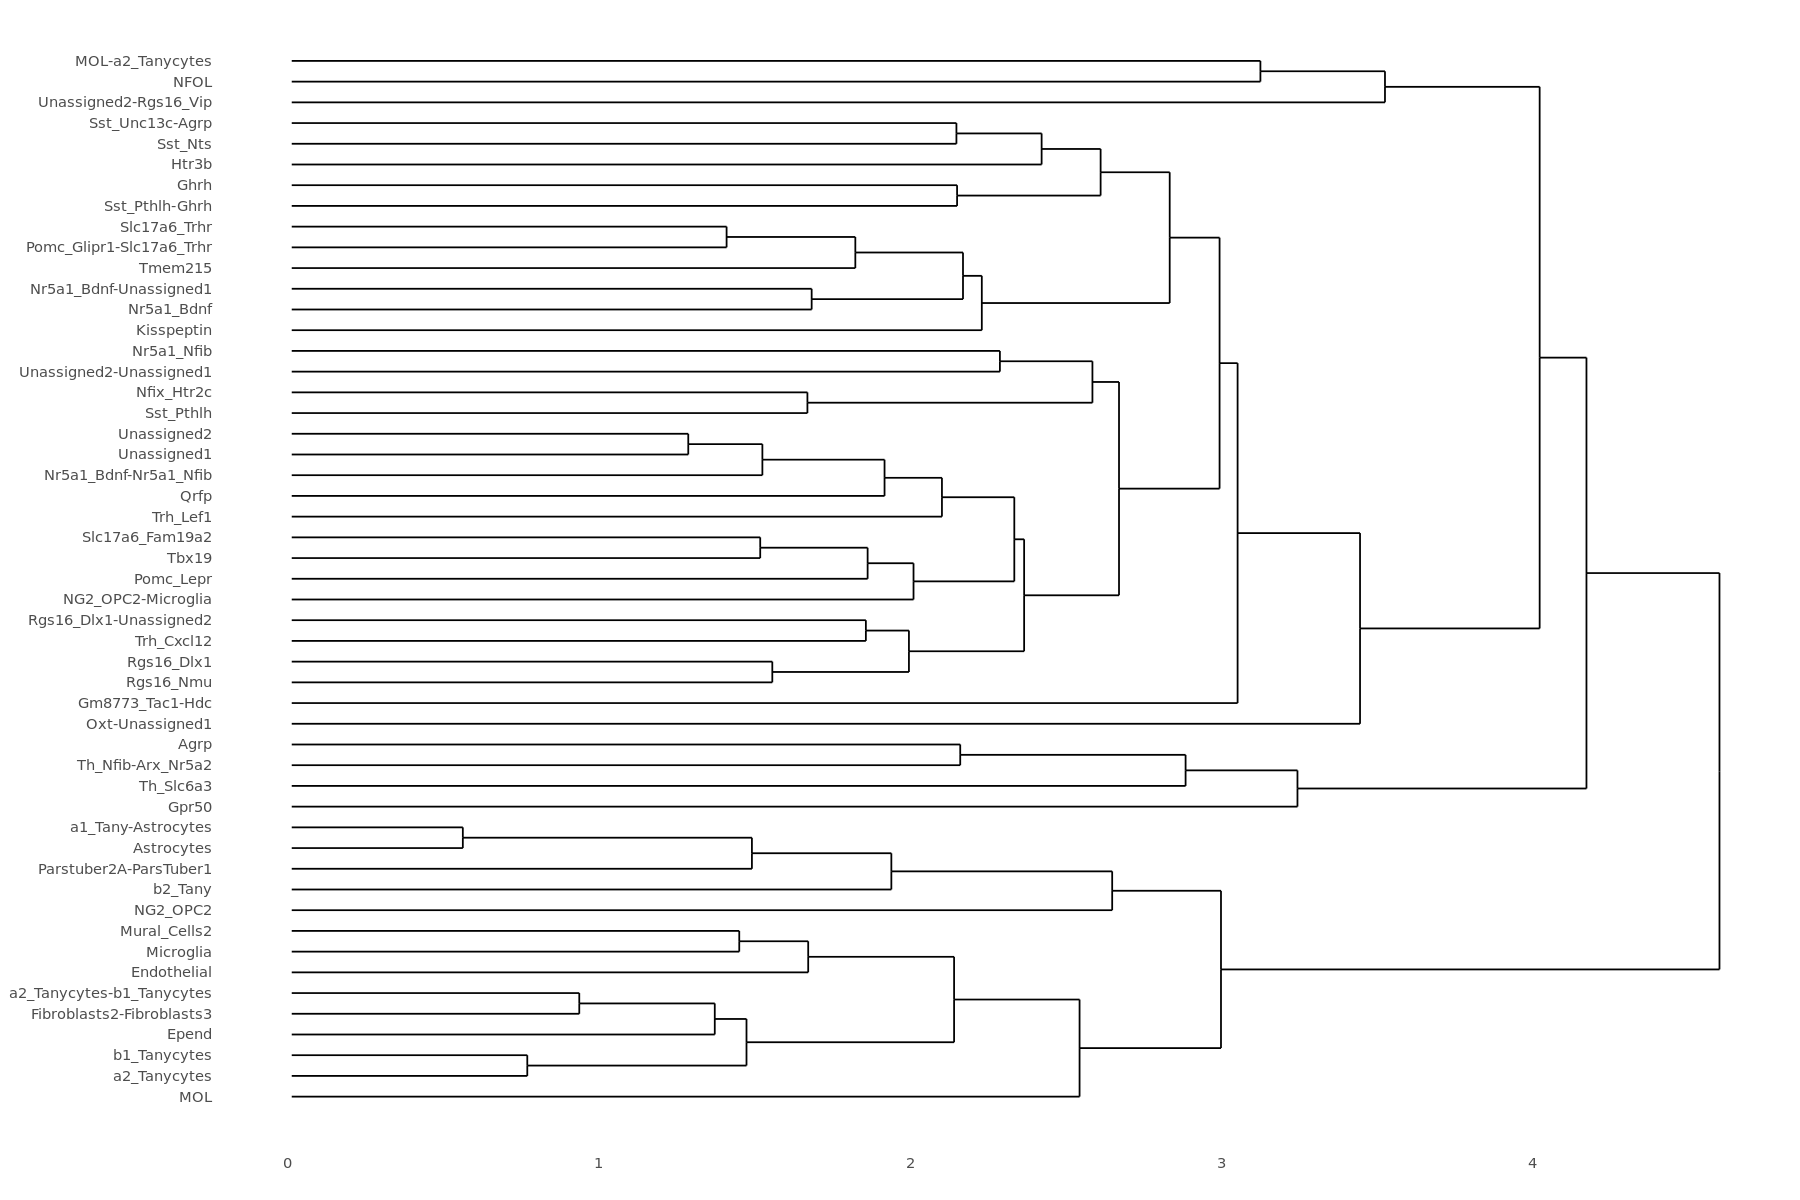

In [144]:
data_gp_matrix <- as.matrix(data_gp[, -c(1)])
rownames(data_gp_matrix) <- data_gp$celltype
data_gp_dendro <- as.dendrogram(hclust(d = dist(x = data_gp_matrix)))

# Create dendro
dendro_plot_gp <- ggdendro::ggdendrogram(data = data_gp_dendro, rotate = TRUE)

# Preview the plot
print(dendro_plot_gp)

In [145]:
data_ct = tidyr::pivot_wider(data, names_from = celltype, values_from = value) #gene pivoted
head(data_ct)

gene,Nr5a1_Bdnf,Unassigned1,Sst_Pthlh-Ghrh,Gm8773_Tac1-Hdc,Tbx19,Th_Nfib-Arx_Nr5a2,Slc17a6_Fam19a2,Nr5a1_Bdnf-Unassigned1,Tmem215,⋯,MOL-a2_Tanycytes,b1_Tanycytes,a1_Tany-Astrocytes,Fibroblasts2-Fibroblasts3,Microglia,a2_Tanycytes-b1_Tanycytes,Epend,Endothelial,Mural_Cells2,Parstuber2A-ParsTuber1
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nfia,0.2333667,0.1591130,0.04988662,0.08594164,0.3739035,0.5208181,0.2294597,0.1447075,0.1324868,⋯,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.000000,0.9339623
Trpm3,0.6557973,0.8633862,0.97278912,0.56445623,0.9214181,0.3878744,0.9190723,0.4689594,0.7927647,⋯,1.0000000,0.9969388,1.0000000,1.0000000,0.9976209,0.9966427,0.9962169,0.9178082,0.995122,1.0000000
Nrxn3,0.8961703,0.8056005,1.00000000,0.98090186,0.9989035,1.0000000,0.7897853,0.9611434,1.0000000,⋯,1.0000000,0.9915816,0.9993404,1.0000000,0.9984140,1.0000000,1.0000000,0.9863014,1.000000,1.0000000
Erbb4,0.4652584,0.6880868,0.85034014,0.20318302,0.6907895,0.6544923,0.9612633,0.7896382,0.7968376,⋯,1.0000000,0.9966837,0.9993404,1.0000000,0.9984140,0.9990408,0.9987390,0.9315068,0.995122,1.0000000
Cntn5,0.9898330,0.9098414,0.90476190,0.54907162,0.9747807,0.7830533,0.8625709,0.7967843,0.7175371,⋯,0.8378378,0.9742347,0.9835092,1.0000000,0.9944489,0.9937650,0.9911728,0.9863014,1.000000,0.9716981
Il1rapl2,0.3455197,0.5775332,0.62131519,0.21644562,0.7222222,0.3133674,0.2714039,0.4609201,0.6197892,⋯,0.3783784,0.9311224,0.8562005,0.9453552,0.9532117,0.9573141,0.9382093,0.8493151,0.995122,0.8207547


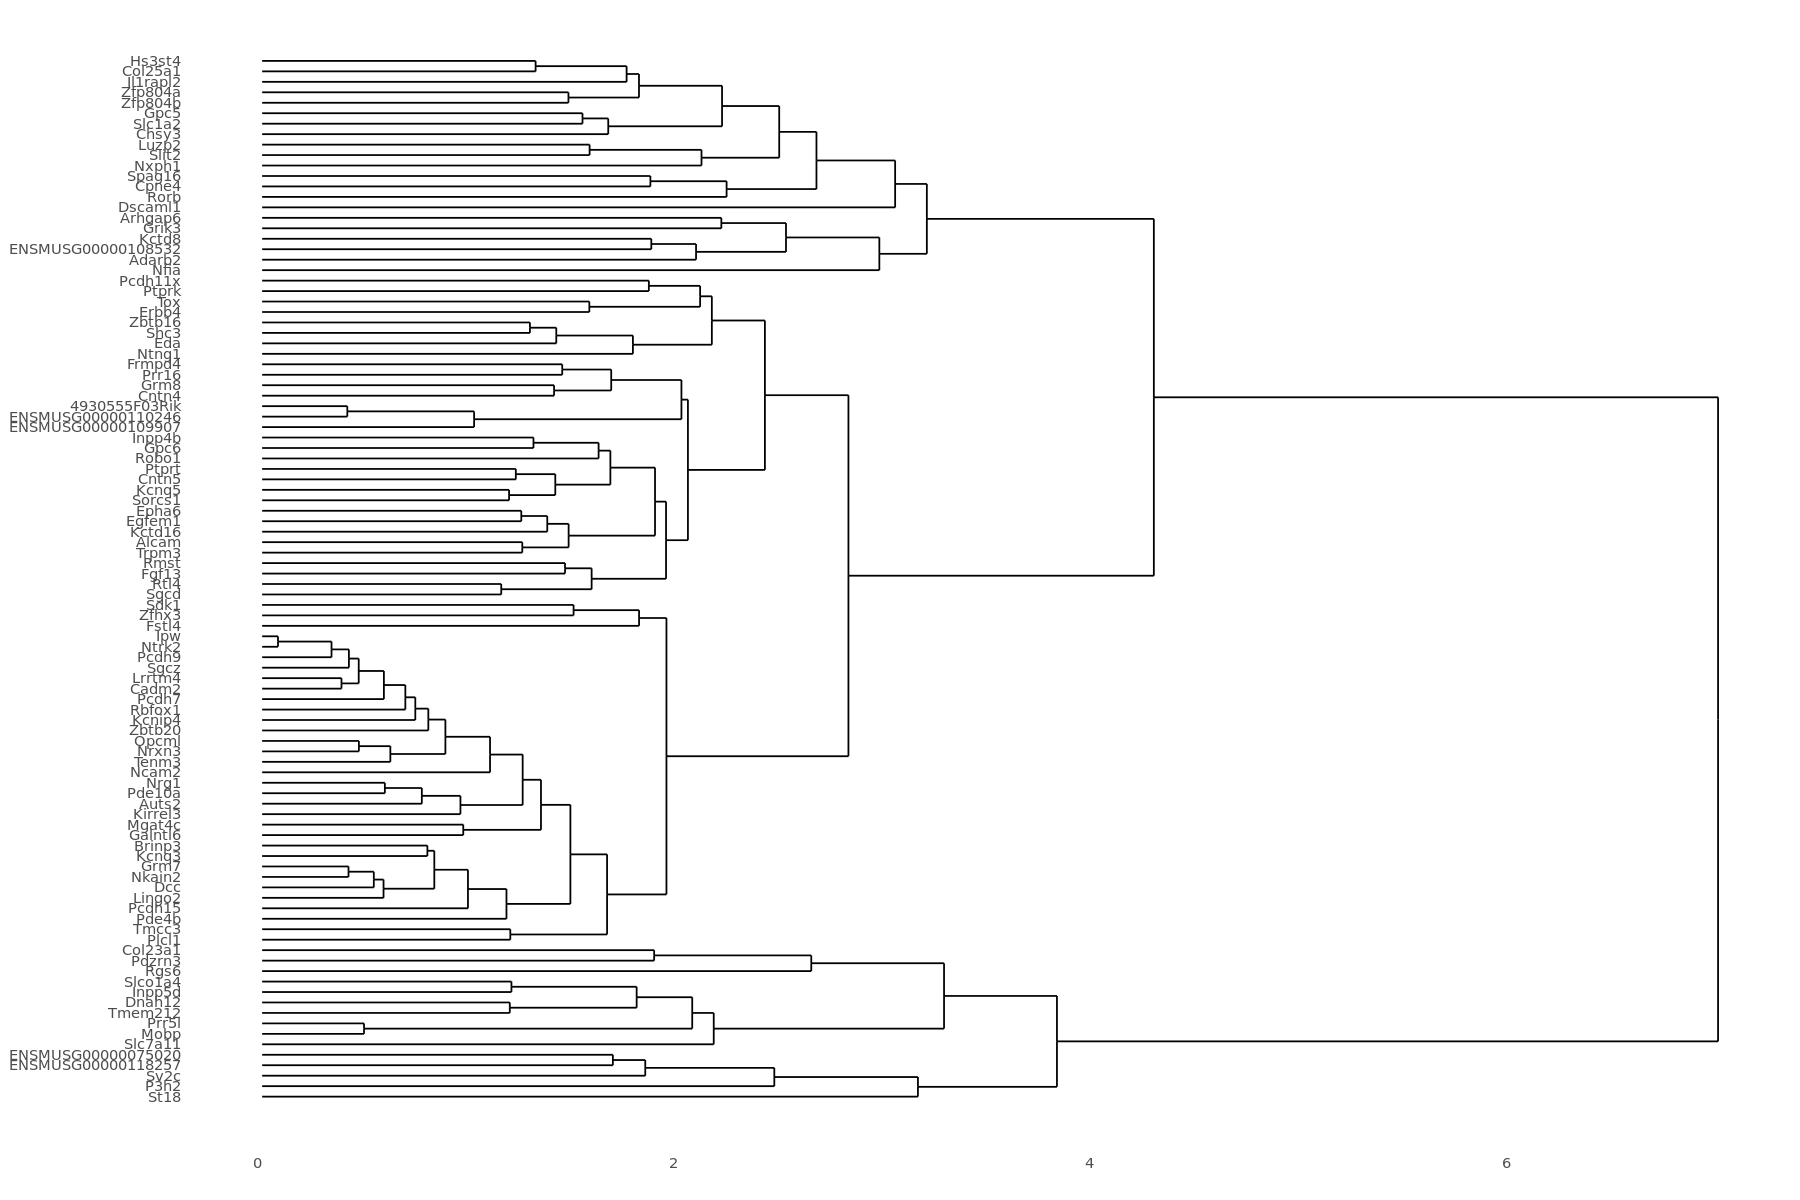

In [146]:
data_ct_matrix <- as.matrix(data_ct[, -c(1)])
rownames(data_ct_matrix) <- data_ct$gene
data_ct_dendro <- as.dendrogram(hclust(d = dist(x = data_ct_matrix)))

# Create dendro
dendro_plot_ct <- ggdendro::ggdendrogram(data = data_ct_dendro, rotate = TRUE)

# Preview the plot
print(dendro_plot_ct)

In [147]:
ct_order = order.dendrogram(data_gp_dendro)
ct_labels = rownames(data_gp_matrix)[ct_order]
gene_order = order.dendrogram(data_ct_dendro)
gene_labels = rownames(data_ct_matrix)[gene_order]


In [148]:
rownames(data_ct_matrix)[gene_order]

[1] "St18"               "P3h2"               "Sv2c"              
  [4] "ENSMUSG00000118257" "ENSMUSG00000075020" "Slc7a11"           
  [7] "Mobp"               "Prr5l"              "Tmem212"           
 [10] "Dnah12"             "Inpp5d"             "Slco1a4"           
 [13] "Rgs6"               "Pdzrn3"             "Col23a1"           
 [16] "Plcl1"              "Tmcc3"              "Pde4b"             
 [19] "Pcdh15"             "Lingo2"             "Dcc"               
 [22] "Nkain2"             "Grm7"               "Kcnq3"             
 [25] "Brinp3"             "Galntl6"            "Mgat4c"            
 [28] "Kirrel3"            "Auts2"              "Pde10a"            
 [31] "Nrg1"               "Ncam2"              "Tenm3"             
 [34] "Nrxn3"              "Opcml"              "Zbtb20"            
 [37] "Kcnip4"             "Rbfox1"             "Pcdh7"             
 [40] "Cadm2"              "Lrrtm4"             "Sgcz"              
 [43] "Pcdh9"              "Ntrk2"              "Ipw"               
 [46] "Fstl4"              "Zfhx3"              "Sdk1"              
 [49] "Sgcd"               "Rtl4"               "Fgf13"             
 [52] "Rmst"               "Trpm3"              "Alcam"             
 [55] "Kctd16"             "Egfem1"             "Epha6"             
 [58] "Sorcs1"             "Kcnq5"              "Cntn5"             
 [61] "Ptprt"              "Robo1"              "Gpc6"              
 [64] "Inpp4b"             "ENSMUSG00000109907" "ENSMUSG00000110246"
 [67] "4930555F03Rik"      "Cntn4"              "Grm8"              
 [70] "Prr16"              "Frmpd4"             "Ntng1"             
 [73] "Eda"                "Shc3"               "Zbtb16"            
 [76] "Erbb4"              "Tox"                "Ptprk"             
 [79] "Pcdh11x"            "Nfia"               "Adarb2"            
 [82] "ENSMUSG00000108532" "Kctd8"              "Grik3"             
 [85] "Arhgap6"            "Dscaml1"            "Rorb"              
 [88] "Cpne4"              "Spag16"             "Nxph1"             
 [91] "Slit2"              "Luzp2"              "Chsy3"             
 [94] "Slc1a2"             "Gpc5"               "Zfp804b"           
 [97] "Zfp804a"            "Il1rapl2"           "Col25a1"           
[100] "Hs3st4"

In [149]:
data$celltype = factor(x = data$celltype, levels = ct_labels)
data$gene = factor(x=data$gene, levels = gene_labels)

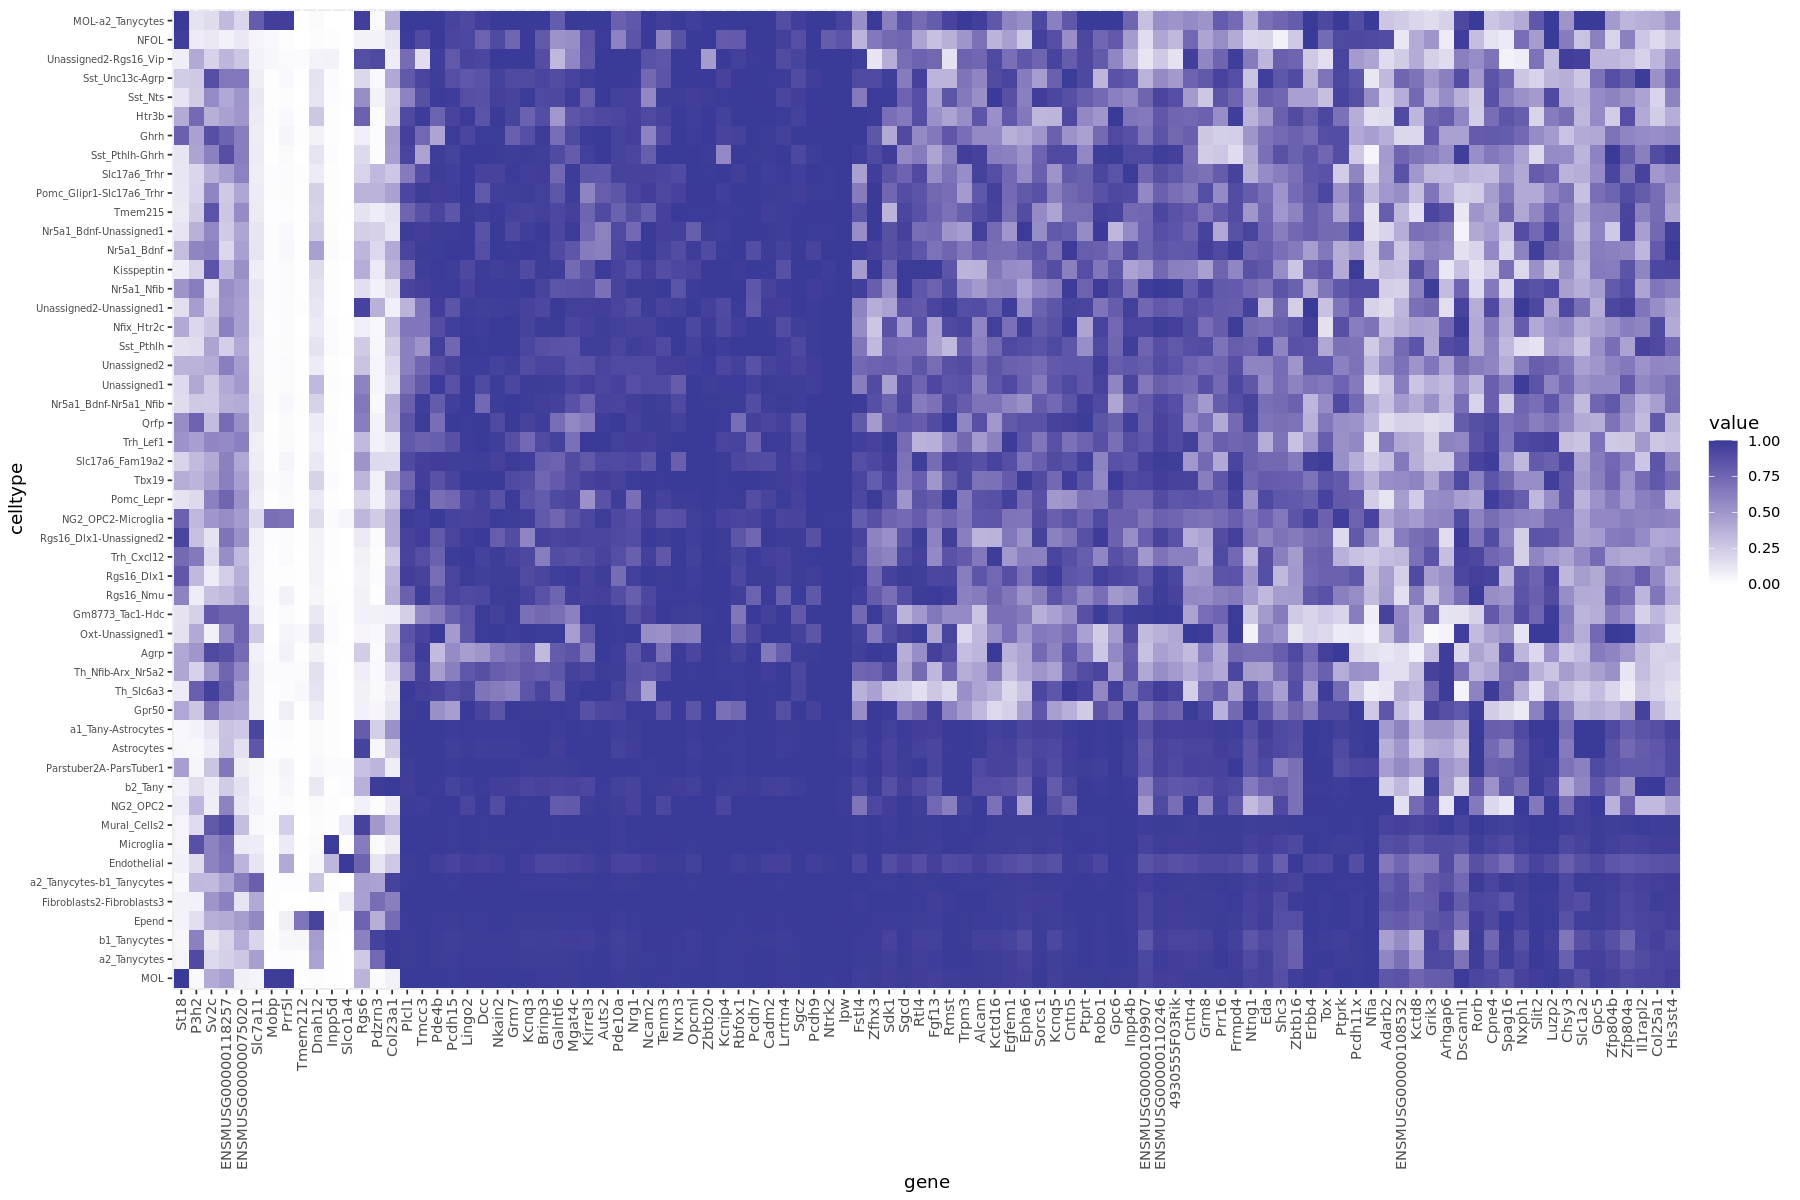

In [150]:
heatmap_plot <- ggplot(data = data, aes(x = gene, y = celltype)) +
  geom_tile(aes(fill = value)) +
  scale_fill_gradient2() +
  theme(axis.text.y = element_text(size = 6),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

# Preview the heatmap
print(heatmap_plot)

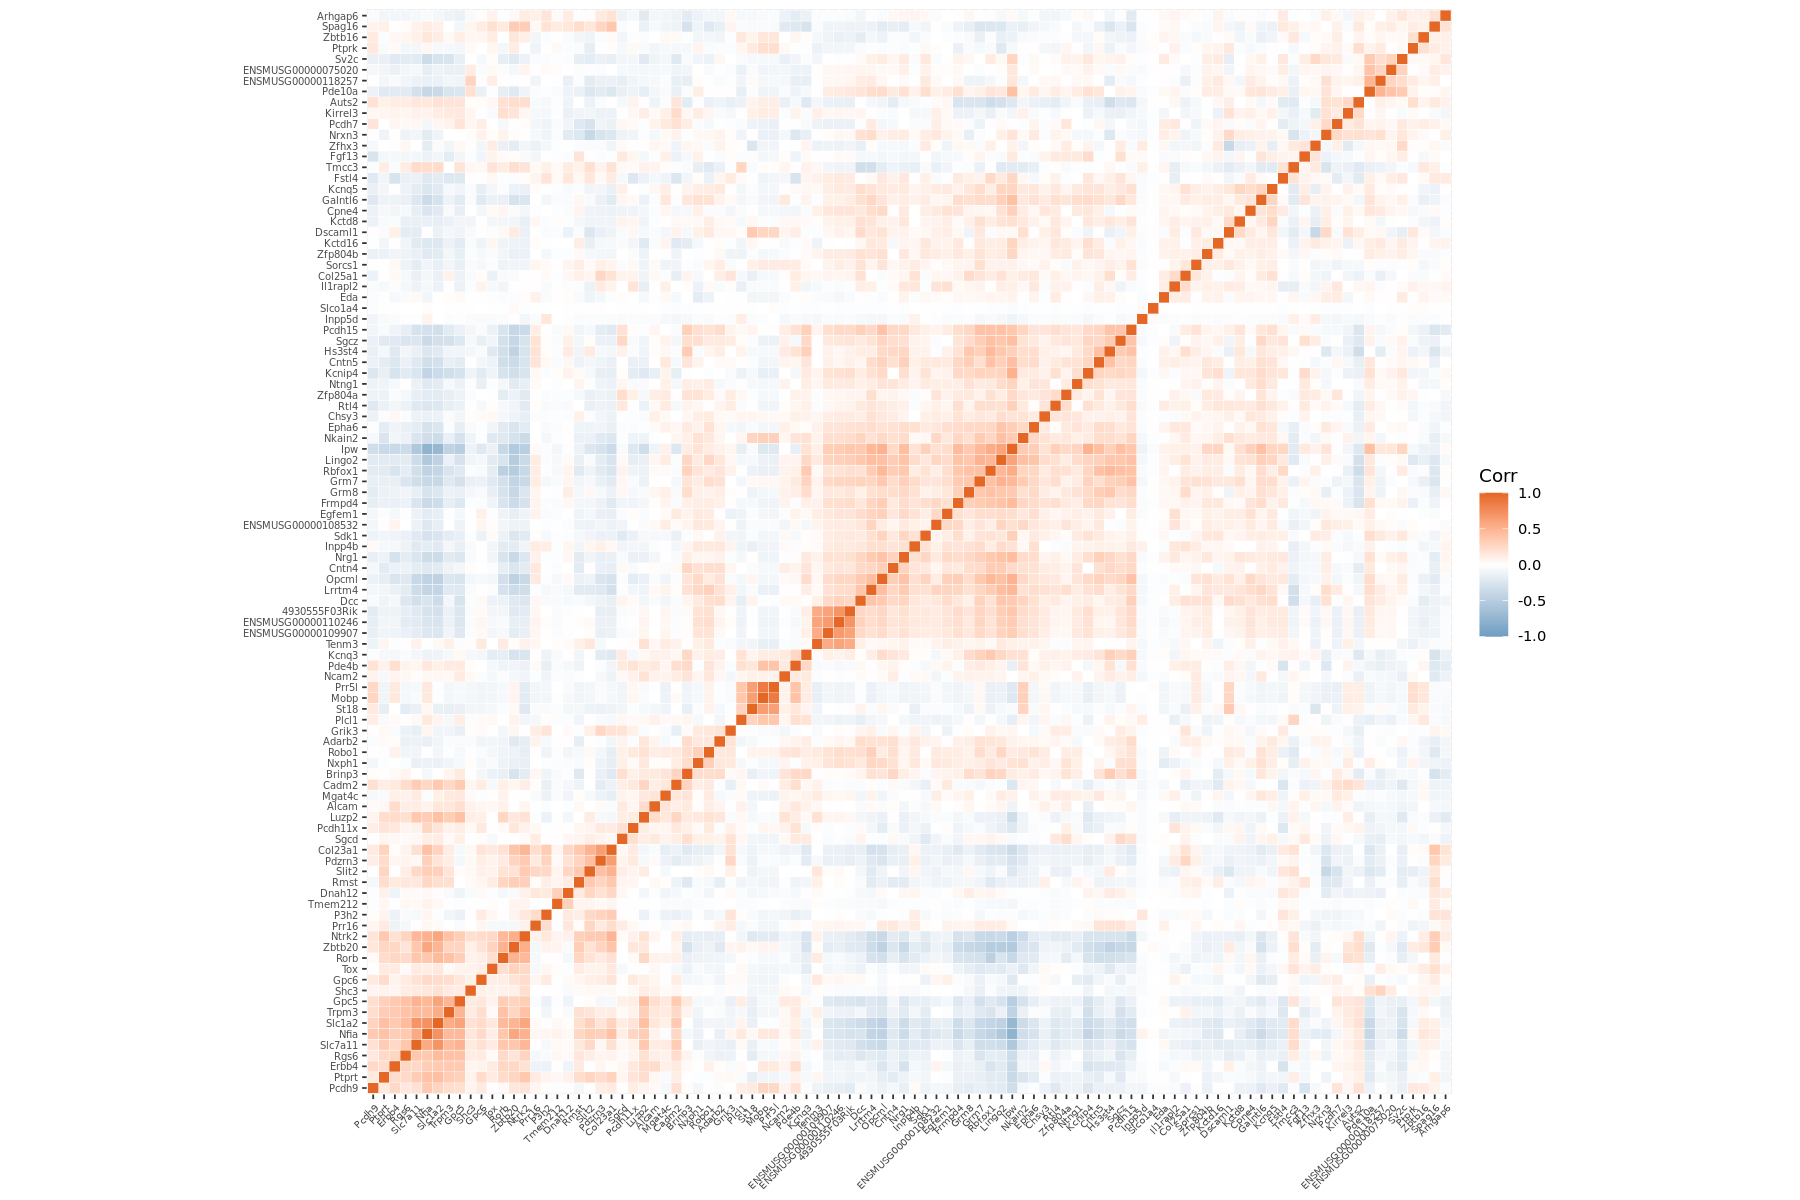

In [138]:
p = plot_coexpression(sce, genes = genes) 
p 